# Handwritten Digits Recognition
- Richard Kuo, 05-21-2018
- run it in docker container `docker run -it --rm -p 8888:8888 -v $(pwd)/handwritten-digits-recognition/:/home/jovyan/work/ jupyter/tensorflow-notebook start.sh jupyter lab`

![file location and execution](https://www.evernote.com/l/AS5V4g3H-SBNabaI0HAHOnjDv1S2sU6XdmUB/image.png)

## Reference
1. https://github.com/s4um1l/mnist-tensorflow-simple/blob/master/MNIST%20-%20Simple.ipynb 
2. https://wosaku.github.io/digits-recognition-tensorflow.html
3. http://dataaspirant.com/2017/05/03/handwritten-digits-recognition-tensorflow-python/
4. https://github.com/GoogleCloudPlatform/tensorflow-without-a-phd/blob/master/tensorflow-mnist-tutorial/mnist_1.0_softmax.py

Most of code here were forked from 2 and 3.

In [1]:
# Data Manipulation and Visualization
import numpy as np

In [2]:
# Get the MINST data. It is available from the tensorflow package

from tensorflow.examples.tutorials.mnist import input_data
# either of following statement works
# mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_dat', one_hot=True)
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

print(mnist.train.images.shape)
print(mnist.test.images.shape)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
(55000, 784)
(10000, 784)


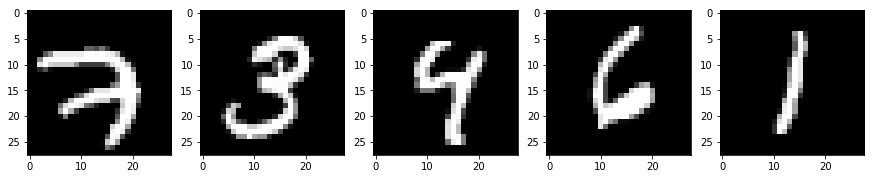

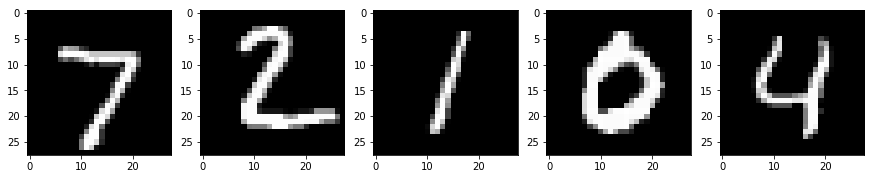

In [3]:
# Show first five figures from training set and testing set.
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
FLAGS = None

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(mnist.train.images[i].reshape(28, 28))

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(mnist.test.images[i].reshape(28, 28))

The label format is the one-hot encoding style. This means that the label corresponds to the index of the array where the value is 1.

Example:
[1,2,3,4,5,6,7,8,9] 
[0,0,0,0,0,0,0,1,0]

In [4]:
print("training labels")
for i in range(5):    
    # printout training labels y-value
    print(mnist.train.labels[i])

print("testing labels")
for i in range(5):    
    # printout training labels y-value
    print(mnist.test.labels[i])

training labels
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
testing labels
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


## Neural Network
### network structure

![nn-digitanl](https://image.slidesharecdn.com/20160226deeplearninginanutshellprd-160501012819/95/deep-learning-in-a-nutshell-42-638.jpg?cb=1462067471)

diagram shows two hiden layer, code here use only one.
- 1 input layer with 784 nodes 
- 1 hidden layer, started with 300 neurons, then try 784 
- 1 output layer with 10 nodes
- calculation batch size, started with 50 data, then try 100, 200

In [5]:
# TensorFlow
import tensorflow as tf

In [6]:
print("Tensorflow version " + tf.__version__)

Tensorflow version 1.5.1


In [7]:
# Network Parameters (784-300-10)
n_input = 784
hidden_layer_neurons = 300
n_classes = 10

# Training Parameters
learning_rate = 0.005
training_epochs = 30000
batch_size = 100

In [8]:
# x and y placeholders, x is video input, y is the label (actual digits)
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

### computation model
Y = W*X + b

In [9]:
# Create weights and biases that will be used in the neural network
# Todo - hidden layer should be indexed, change x->X later
w1 = tf.Variable(tf.random_normal([n_input, hidden_layer_neurons]))
w2 = tf.Variable(tf.random_normal([hidden_layer_neurons, n_classes]))
b1 = tf.Variable(tf.random_normal([hidden_layer_neurons]))
b2 = tf.Variable(tf.random_normal([n_classes]))

In [10]:
# The multilayer perceptron model, computation model is defined above
# Todo - change the activation function later
# hidden_layer = tf.nn.sigmoid(tf.add(tf.matmul(x, w1), b1))
hidden_layer = tf.nn.relu(tf.add(tf.matmul(x, w1), b1))
# aka y-hat/prediction
output_layer = tf.add(tf.matmul(hidden_layer, w2), b2)

## Cost function and Optimizer
The Cost is defined using the cross-entropy function and Adam optimizer is used to minimize the cost, optional is gradient descent.

In [11]:
# Cost funcition and optimizer
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer, labels=y))
train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

# loss/cost
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=output_layer))

# gradient descent on loss 
# train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

## Model Evaluation and Accuracy
- tf.argmax - Returns the index with the largest value across axes of a tensor. 
- tf.equal - Returns the truth value of (x == y) element-wise.
- tf.casts - cast a tensor to a new type.

In [12]:
# Define the Test model and accuracy
correct_prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
correct_prediction = tf.cast(correct_prediction, "float")
# Computes the mean of elements across dimensions of a tensor.
accuracy = tf.reduce_mean(correct_prediction)

# Tensor Flow session

In [13]:
# Launch the session
sess = tf.InteractiveSession()

# Initialize variables
init = tf.global_variables_initializer()

# Start session
sess.run(init)

In [14]:
# %%timeit
# Accuracies arrays to create a plot
train_accuracies = []
validation_accuracies = []
epoc_iteration = []

# Run the session, save the accuracies
for epoch in range(training_epochs):    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    if (epoch+1) < 100 or (epoch+1) % 100 == 0:
        train_ac = accuracy.eval({x: batch_x, y: batch_y})
        validation_ac = accuracy.eval({x: mnist.validation.images, 
                                       y: mnist.validation.labels})
        epoc_iteration.append(epoch+1)
        train_accuracies.append(train_ac)
        validation_accuracies.append(validation_ac)
    sess.run([train_step, cross_entropy], feed_dict={x: batch_x, y: batch_y})
    


Text(0.5,1,'Training and Validation accuracy')

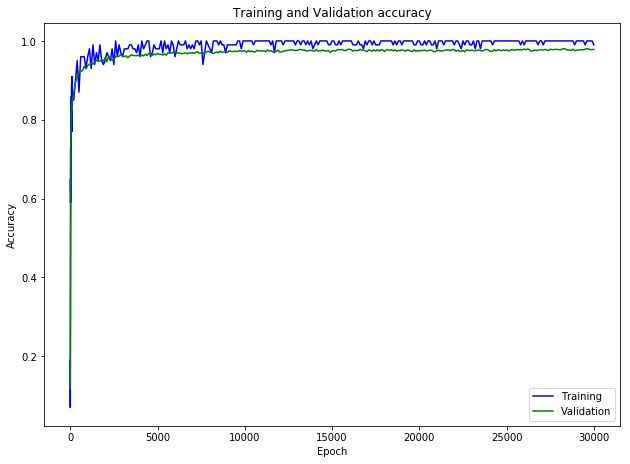

In [15]:
# Plot the training and validation accuracies
# Creates blank canvas
fig = plt.figure(figsize=(10,7))
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Plot full graph
axes1.plot(epoc_iteration, train_accuracies,'-b', label='Training')
axes1.plot(epoc_iteration, validation_accuracies,'-g', label='Validation')
axes1.legend()
axes1.set_xlabel('Epoch')
axes1.set_ylabel('Accuracy')
axes1.set_title('Training and Validation accuracy')

In [16]:
# Print final accuracies
print("Validation Accuracy:", accuracy.eval({x: mnist.validation.images, y: mnist.validation.labels}))
print("Test Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Validation Accuracy: 0.9782
Test Accuracy: 0.9767


Performance

| Hidden Layer Neurons | Learnling Rate | Epochs | Batch Size | Test Accuracy | Session Timeit | Comments |
|:---------------------|:---------------|:-------|:-----------|:--------------|:---------------|:---------|
| 300 | 0.005 | 30000 |  50 | 0.8535 | 2min 5s | initial, use GradientDescentOptimizer |
| 300 | 0.005 | 30000 | 100* | 0.9204 | 2min 34s | fair increase |
| 784* | 0.005 | 30000 | 100 | 0.9156 | 4min 58s | time doubled, accuracy reduced a little |
| 300 | 0.005 | 30000 | 200* | 0.9193 | 3min 31s | no further improvement |
| 300 | 0.005 | 30000 | 100 | 0.9722 | 2min 24s | use AdamOpimizer accurancy increased |
| 300 | 0.005 | 30000 | 100 | 0.9834 | 2min 47s | use Relu->increased little|


## Save the results/model
Save B1, W1, and B2, W2 for future apps

In [17]:
# Save weight and bias as theta1 to be used in the proof-of-concept app, theta1 [784,300]
# theta1 = np.concatenate((b1.eval().reshape(1,hidden_layer_neurons),w1.eval()),axis=0)
# np.savetxt("theta1.csv", theta1, delimiter=",")

In [18]:
# Save weight and bias as theta2 to be used in the proof-of-concept app, theta2 [300, 10]
# theta2 = np.concatenate((b2.eval().reshape(1,n_classes),w2.eval()),axis=0)
# np.savetxt("theta2.csv", theta2, delimiter=",")